In [3]:
from neurolib.models.aln import ALNModel

model = ALNModel()
model.params['sigma_ou'] = 0.1 # add some noise

model.run()

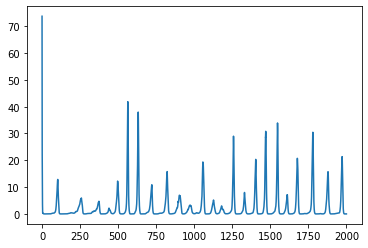

In [4]:
import matplotlib.pyplot as plt
plt.plot(model.t, model.output.T)

In [1]:
from neurolib.utils.loadData import Dataset
from neurolib.models.aln import ALNModel
from neurolib.models.ww import WWModel
from neurolib.models.wc import WCModel
import matplotlib.pyplot as plt
import neurolib.utils.functions as func

ds = Dataset("gw")

In [2]:
aln = WWModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

aln.params['duration'] = 3*60*1000
aln.params['dt'] = 1
aln.params['r_exc'] = 5
aln.params['r_inh'] = 2
# We set an appropriate level of noise
aln.params['sigma_ou'] = 1
# And turn on adaptation with a low value of spike-triggered adaptation currents.
# aln.params['b'] = 1.0

In [397]:
aln.run(chunkwise=True)

In [398]:
aln.outputs

{'t': array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.998e+03, 1.999e+03,
        2.000e+03]),
 'r_exc': array([[3.60120208e-001, 2.88374380e-001, 9.20790446e-001, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [1.56747815e-261, 1.70476664e-230, 5.75977212e-187, ...,
         5.02582849e-200, 2.51394855e-258, 1.15696874e-279],
        [3.11148792e-137, 6.31214419e-116, 2.48245871e-116, ...,
         1.45092871e-054, 6.14894559e-066, 2.05320696e-094],
        ...,
        [2.99653103e-001, 6.80154643e-001, 2.45813053e-001, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [6.79833244e-247, 5.41334532e-238, 2.25772625e-221, ...,
         1.78419369e-212, 3.73480780e-221, 1.61456930e-195],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         1.78042535e-041, 6.13285362e-051, 3.05553392e-051]]),
 'r_inh': array([[1.75305640e+000, 1.54473875e+000, 2.74650307e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.0000000

AttributeError: 'WWModel' object has no attribute 'BOLD'

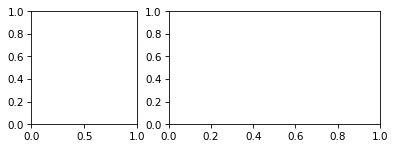

In [188]:
import scipy

fig, axs = plt.subplots(1, 2, figsize=(6, 2), dpi=75, gridspec_kw={'width_ratios' : [1, 2]})
axs[0].imshow(func.fc(aln.BOLD.BOLD[:, 5:]))
axs[1].imshow(scipy.stats.mstats.zscore(aln.BOLD.BOLD[:, aln.BOLD.t_BOLD>10000], axis=1), aspect='auto', extent=[aln.BOLD.t_BOLD[aln.BOLD.t_BOLD>10000][0], aln.BOLD.t_BOLD[-1], 0, aln.params['N']]);

axs[0].set_title("FC")
axs[0].set_xlabel("Node")
axs[0].set_ylabel("Node")
axs[1].set_xlabel("t [ms]")

# the results of the model are also accesible through an xarray DataArray
fig, axs = plt.subplots(1, 1, figsize=(6, 2), dpi=75)
plt.plot(aln.xr().time, aln.xr().loc['rates_exc'].T);

In [3]:
import numpy as np

def eeg_signal(outputs):
    eeg_t = [0]
    for i_t, t in enumerate(outputs['t']):
        sum_exc = np.sum(outputs['r_inh'][:,i_t])
        eeg_t_next = 0.9*eeg_t[-1] + 0.1*sum_exc
        eeg_t.append(eeg_t_next)
    return eeg_t

In [415]:
eeg_sgn = eeg_signal(aln.outputs)

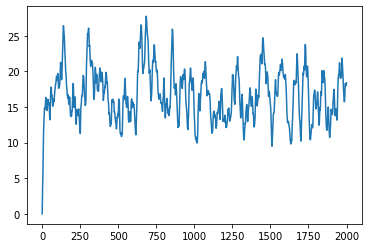

In [416]:
plt.plot(eeg_sgn)

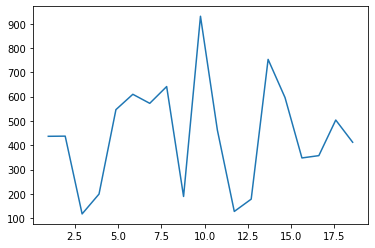

In [417]:
plt.plot(fft.fftfreq(1024, 1e-3)[1:20], np.abs(scipy.fft.fft(eeg_sgn[750:1774]))[1:20])

In [387]:
fft.fftfreq(10000, 1e-3)

array([ 0. ,  0.1,  0.2, ..., -0.3, -0.2, -0.1])

In [4]:
import scipy.fft as fft

def extract_UAF(outputs, frame = [500,None]):
    eeg_sgn = eeg_signal(aln.outputs)
    fft_eeg_sgn = np.abs(fft.fft(eeg_sgn[frame[0]:frame[1]]))
    PAF = 8+np.argmax(fft_eeg_sgn[8:13])
    UAF = np.mean(fft_eeg_sgn[PAF:PAF+3])
    return UAF

In [274]:
extract_UAF(aln.outputs)

6576.680935670865

In [306]:
UAFs = []
for t in range(500, len(aln.outputs['t'])-1000, 200):
    UAFs.append(extract_UAF(aln.outputs, [t, t+1000]))

(array([ 3.,  7.,  5.,  4.,  5., 11.,  6., 12., 23., 14.,  9., 15., 13.,
         9.,  6.,  8.,  2.,  5.,  5.,  5.,  4.,  6.,  4.,  2.,  0.,  1.,
         2.,  0.,  0.,  3.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         2.]),
 array([125.27370782, 138.98248731, 152.6912668 , 166.40004628,
        180.10882577, 193.81760526, 207.52638475, 221.23516424,
        234.94394373, 248.65272322, 262.36150271, 276.0702822 ,
        289.77906168, 303.48784117, 317.19662066, 330.90540015,
        344.61417964, 358.32295913, 372.03173862, 385.74051811,
        399.4492976 , 413.15807709, 426.86685657, 440.57563606,
        454.28441555, 467.99319504, 481.70197453, 495.41075402,
        509.11953351, 522.828313  , 536.53709249, 550.24587197,
        563.95465146, 577.66343095, 591.37221044, 605.08098993,
        618.78976942, 632.49854891, 646.2073284 , 659.91610789,
        673.62488737]),
 <BarContainer object of 40 artists>)

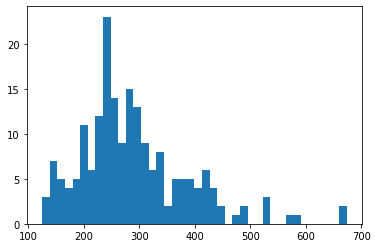

In [308]:
plt.hist(UAFs, bins=40)

In [ ]:
def neurofeedback_computation(outputs):
    

In [89]:
n_chunks = 15

aln.run(chunkwise=True, chunksize=1000, append=True, continue_run=True)

for _ in range(n_chunks):
   # compute your stimulus base on the model output
   your_stimulus = compute_your_stimulus(model.output)
   # set the stimulus
   model.params[‘ext_exc_current’] = your_stimulus
   model.run(chunkwise=True, chunksize=1000, append=True, continue_run=True)

0.001669168472290039
0.0006439685821533203


In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
class MSN_Unit:
    def __init__(self, w_init, lr = 0.1):
        self.weight = w_init
        self.state = 0
        self.update_state()
        self.lr = lr
    def update_state(self):
        rand = np.random.random()
        self.state = int(rand<sigmoid(self.weight))
    def update_weight(self, feedback):
        self.weight += self.state * self.lr * feedback

In [7]:
from tqdm import tqdm
striatal_network = [MSN_Unit(0.01, lr=0.1) for i in range(1000)]
n_chunks = 200
target_units_idx = range(2)
UAF_baseline = 400
UAFs = []
base_stimulus = 5
additional_stimulus = 3
aln = WWModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

aln.params['duration'] = 3*60*1000
aln.params['dt'] = 1
aln.params['r_exc'] = 5
aln.params['r_inh'] = 2
# We set an appropriate level of noise
aln.params['sigma_ou'] = 1
aln.run(chunkwise=True, chunksize=1000, append=True, continue_run=True)

for _ in tqdm(range(n_chunks)):
    #print(np.mean([u.weight for u in striatal_network]))
    target_units_signal = 0
    for i_unit, unit in enumerate(striatal_network):
        unit.update_state()        
        if i_unit in target_units_idx:
            target_units_signal += unit.state
    target_units_signal /= len(target_units_idx)
    stimulus = base_stimulus + target_units_signal * additional_stimulus
    
    aln.params['r_exc'] = stimulus
    aln.run(chunkwise=True, chunksize=1000, append=True, continue_run=True)
    
    UAF = extract_UAF(aln.outputs, frame = [-1000, None])
    UAFs.append(UAF)
    feedback = 1-2*(UAF<UAF_baseline)
    for i_unit, unit in enumerate(striatal_network):
        unit.update_weight(feedback)
    

  0%|          | 0/200 [00:51<?, ?it/s]


KeyboardInterrupt: 

In [445]:
[u.state for u in striatal_network]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


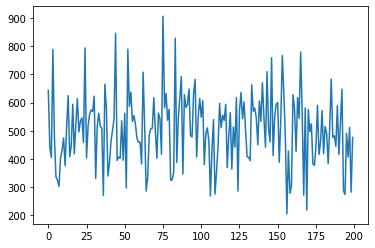

In [444]:
plt.plot(UAFs)